In [213]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [214]:
train=pd.read_csv("/storage/emulated/0/Download/train kaggle.csv",index_col=0)
test=pd.read_csv("/storage/emulated/0/Download/test kaggle.csv",index_col=0)

In [215]:
test.shape


(1459, 79)

In [216]:
train.shape

(1460, 80)

In [217]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

this does not give all the columns,so we have to find a way to print all the columns and their missing values

In [218]:
def PrintMissing(dataframe):
    dictionary_of_missing={}
    list_of_missing=list(dataframe.isna().sum())
    for i in dataframe.isna().sum():
        if i>0:
            index_of_missing=list_of_missing.index(i)
            list_of_missing[index_of_missing]=0
            dictionary_of_missing[dataframe.columns[index_of_missing]]=i
    return dictionary_of_missing

In [219]:
PrintMissing(train)

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [220]:
PrintMissing(test)

{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

there are some of the columns such as fence on which NaNmeans the houses don't have that property.

In [221]:
list_of_useful_NaN=["Fence","Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","MiscFeature"]

In [222]:
for i in list_of_useful_NaN:
    train[i]=train[i].fillna("None")
    test[i]=test[i].fillna("None")
    encoder=LabelEncoder()
    train[i]=encoder.fit_transform(train[i])
    test[i]=encoder.transform(test[i])

In [223]:
PrintMissing(train)

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1,
 'GarageYrBlt': 81}

In [224]:
PrintMissing(test)

{'MSZoning': 4,
 'LotFrontage': 227,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'GarageYrBlt': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'SaleType': 1}

let me check the details of the other missing values

In [225]:
for i in PrintMissing(train).keys():
    print(train[i].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


In [226]:
for i in PrintMissing(test).keys():
    print(train[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0      

i would replace the remaining columns with the most frequent of each columns

In [227]:
y=train["SalePrice"]
X=train.drop("SalePrice",axis=1)

In [228]:
list_of_object_columns=[]
for i in X.columns:
    if train[i].dtype==object:
        list_of_object_columns.append(i)

In [229]:
list_of_object_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [230]:
objectonly_X=X[list_of_object_columns]
objectonly_test=test[list_of_object_columns]

In [231]:
imputer=SimpleImputer(strategy="most_frequent")
objectonly_X=pd.DataFrame(imputer.fit_transform(objectonly_X),columns=objectonly_X.columns)
objectonly_test=pd.DataFrame(imputer.transform(objectonly_test),columns=objectonly_test.columns)

In [232]:
objectonly_X.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [233]:
for i in objectonly_X.columns:
    encoder=LabelEncoder()
    objectonly_X[i]=encoder.fit_transform(objectonly_X[i])
    objectonly_test[i]=encoder.transform(objectonly_test[i])
    X[i]=objectonly_X[i]
    test[i]=objectonly_test[i]

In [234]:
X.dtypes

MSSubClass         int64
MSZoning         float64
LotFrontage      float64
LotArea            int64
Street           float64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType         float64
SaleCondition    float64
Length: 79, dtype: object

In [343]:
pipe=Pipeline([("imputer",SimpleImputer()),("scaler",MinMaxScaler()),("model",GradientBoostingRegressor(n_estimators=150))])

In [345]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='l...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [357]:
print(pipe.score(X,y))

0.9696722475802221


In [358]:
score=pipe.predict(X)

In [359]:
print(mean_absolute_error(y,score))

10193.24089013474


In [360]:
pred=pipe.predict(test)

In [361]:
result_dic={"Id":test.index,"SalePrice":pred}
result=pd.DataFrame(result_dic)

In [362]:
result=result.set_index("Id")

In [363]:
result.to_csv("/storage/emulated/0/kaggle_advanced_submission.csv")

The solution scored 0.13908 on the leaderboardbut i can still apply some feature engineering to improve our score

In [364]:
feature_importance=pipe.named_steps["model"].feature_importances_

In [365]:
list_feature_importance=list(feature_importance)
list_features=list(X.columns)
for i in list_feature_importance:
    if i==0:
        index_i=list_feature_importance.index(i)
        feature=list_features[index_i]
        list_features.remove(feature)
        list_feature_importance.remove(i)

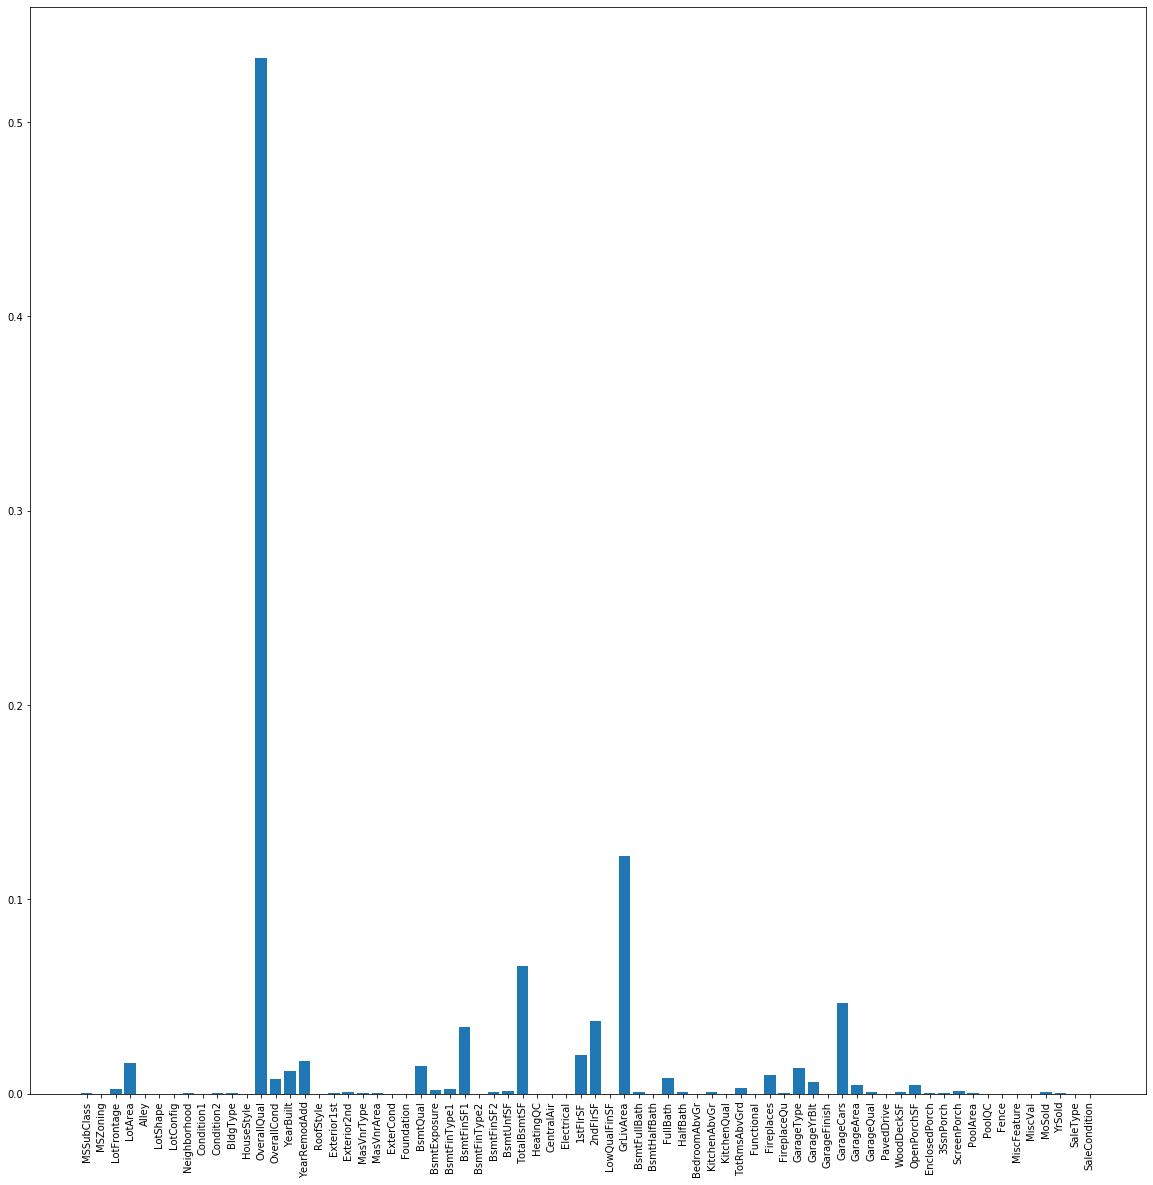

In [366]:
plt.figure(figsize=(20,20))
plt.bar(range(len(list_features)),list_feature_importance)
plt.xticks(range(len(list_features)),list_features,rotation=90)
plt.show() #

the most important feature is the OverallQual which is the overall quality , then the GrLivingArea which is the living area square feet, followed by the GarageCars,TotalBsmtSf,BsmtFinSF1

i would do feature engineering later